
# Stochastic Simulation: Discrete Random Variable (DRV)

In [2]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import random as rd
from operator import add

import TidySimStat as tss

`TidySimStat.py` by Edward J. Xu is imported. Last modifed date is June 1, 2020.


## 1. Inverse Transform Method / Direct Method / Crude Method

## 2. Rejection Method / Acceptance-Rejection Method

In [2]:
help(sim_drv_reject)

In [3]:
def exam_sim_reject():
    fq = rd.randint(0, 10)

In [4]:
def pmf_q_uniform(j:int):
    if j < 0 or type(j) is not int:
        raise Exception("j must be a non-negative integer!")
    elif j <= 9:
        pm = 0.1
    else:
        pm = 0
    return pm

## 2. Alias Method

In [5]:
help(tss.check_posi_pmf)

In [6]:
li = [0.39, 0.2, 0.2, 0.2, 0.01]
check_posi_pmf(li, False)

The input is a 5-point positive PMF.


In [8]:
help(tss.find_ij)

In [9]:
help(tss.set_alias)

In [10]:
def exam_set_alias():
#     p = [7/16, 0.5, 1/16]
    p = [7/16, 1/4, 1/8, 3/16]
#     p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
#     p = [0.2, 0.2, 0.2, 0.2, 0.2]
    alias = set_alias(p)
    print(alias)
    
    
exam_set_alias()

        1     2      3       4  i  j
1  0.2500  0.75  0.000  0.0000  2  1
2  0.6250  0.00  0.375  0.0000  3  1
3  0.4375  0.00  0.000  0.5625  1  4


In [11]:
help(tss.run_alias)

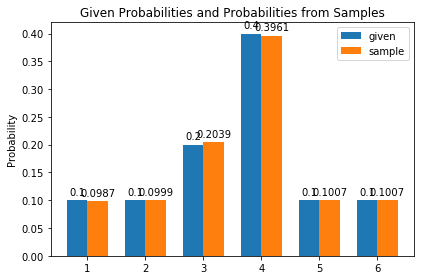

In [12]:
def exam_run_alias():
    num_sim = 10000
#     p = [7/16, 1/4, 1/8, 3/16]
    p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
    n = len(p)
    alias = set_alias(p)
    
    xs = [run_alias(alias) for l in range(num_sim)]
    p_sample = [xs.count(l) / num_sim for l in range(1, n+1)]
    
    ## Start plotting.
    labels = [l for l in range(1, n+1)]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, p, width, label='given')
    rects2 = ax.bar(x + width/2, p_sample, width, label='sample')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Given Probabilities and Probabilities from Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


exam_run_alias()

## 3. Chi-Squared Goodness-of-Fit Test of Samples

In [13]:
help(test_dist)

The function `cal_stat_gof` is a bit different from that in `RNG.ipynb`

In [14]:
def cal_stat_gof(li_count, li_cdf):
    """Calculate the statistic in Goodness of Fit test."""
    li_p = [li_cdf[0]] + [li_cdf[i] - li_cdf[i-1] for i in range(1, len(li_cdf))]
    n = sum(li_count)
    k = len(li_p)
    stat = sum( [(li_count[i] - n * li_p[i])**2 / n / li_p[i] for i in range(k)] )
    print(f"Chi-squared goodness of fit test: {stat:.4f}.")
    
    return stat

In [15]:
def cal_pvalue_chi2(stat, df):
    """Calculate the pvalue of two-sided t-test using Chi-Square distribution."""
    pvalue = 1 - st.chi2.cdf(stat, df)
    print(f"The input stat: {stat:.4f}. \n"
        f"The p value from Chi-Square distribution: {pvalue:.4f}.")
    return pvalue

In [16]:
num_sim = 10000
#     p = [7/16, 1/4, 1/8, 3/16]
p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
n = len(p)
alias = set_alias(p)

xs = [run_alias(alias) for l in range(num_sim)]
li_count = [xs.count(l) for l in range(1, n+1)]

li_cdf = [0.1, 0.2, 0.4, 0.8, 0.9, 1]
stat = cal_stat_gof(li_count, li_cdf)
pvalue = cal_pvalue_chi2(stat, df=5)
test_dist(pvalue)

Chi-squared goodness of fit test: 6.2420.
The input stat: 6.2420. 
The p value from Chi-Square distribution: 0.2834.
Null hypothesis: two populations have the same distribution. 
The input p value is 0.2834. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True. 



## Alias Method by the Teacher

In [17]:
def set_alias_direct(p):
    k = len(p)
    l = [x for x in range(1, k+1)]
    f = [k * x for x in p]
    g = [i+1 for i, x in enumerate(f) if x >= 1]
    s = [i+1 for i, x in enumerate(f) if x <= 1]
    
    while len(s) > 0:  # and len(g) > 0
        ## To make sure that indices are integers
        i = int(g[0])
        j = int(s[0])
        
        l[j-1] = i
        f[i-1] = f[i-1] - (1 - f[j-1])
        if f[i-1] < 1 - 0.000001:
            del g[0]
            s = s + [i]
        del s[0]
    
    return f, l

In [18]:
p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
# p = [7/16, 1/4, 1/8, 3/16]
# p = [7/16, 0.5, 1/16]
# p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
f, l = set_alias_direct(p)
print(f)
print(l)

[0.6000000000000001, 0.6000000000000001, 0.8000000000000003, 1.0000000000000009, 0.6000000000000001, 0.6000000000000001]
[3, 4, 4, 4, 4, 4]


In [19]:
def run_alias_direct(f, l):
    k = len(f)
    i = rd.randint(1, k)
    if rd.random() <= f[i-1]:
        x = i
    else:
        x = l[i-1]
    return x

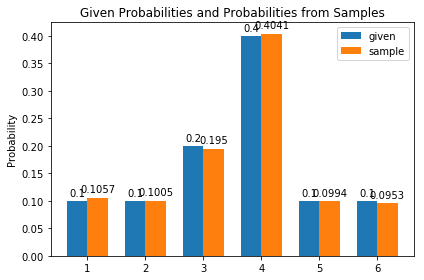

In [20]:
def exam_run_alias_direct():
    num_sim = 10000
    p = [0.1, 0.1, 0.2, 0.4, 0.1, 0.1]
#     p = [7/16, 1/4, 1/8, 3/16]
#     p = [7/16, 0.5, 1/16]
#     p = [1/4, 1/2, 1/4]
#     p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
    n = len(p)
    f, l = set_alias_direct(p)
    
    xs = [run_alias_direct(f, l) for s in range(num_sim)]
    p_sample = [xs.count(s) / num_sim for s in range(1, n+1)]
    
    ## Start plotting.
    labels = [l for l in range(1, n+1)]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, p, width, label='given')
    rects2 = ax.bar(x + width/2, p_sample, width, label='sample')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability')
    ax.set_title('Given Probabilities and Probabilities from Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()


exam_run_alias_direct()

In [21]:
def pmf2pdf(pmf):
    k = len(pmf)
    pdf = [pmf[0] for i in range(k)]
    for i in range(1, k):
        pdf[i] = pmf[i] + pdf[i-1]
    return pdf

In [22]:
num_sim = 10000
p = [17/96, 1/12, 1/3, 1/4, 1/24, 11/96]
f, l = set_alias_direct(p)

xs = [run_alias_direct(f, l) for s in range(num_sim)]
li_count = [xs.count(l) for l in range(1, n+1)]

li_cdf = pmf2pdf(p)
stat = cal_stat_gof(li_count, li_cdf)
pvalue = cal_pvalue_chi2(stat, df=5)
test_dist(pvalue)

Chi-squared goodness of fit test: 4.3183.
The input stat: 4.3183. 
The p value from Chi-Square distribution: 0.5046.
Null hypothesis: two populations have the same distribution. 
The input p value is 0.5046. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True. 

